***INTRODUCCION A KERAS***

In [0]:
#Obtener el DATASET
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

In [0]:
#Descomprimimos el dataset
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio con fotos entrenadas de gatos
train_cats_dir = os.path.join(train_dir, 'cats')

# Directorio con fotos entrenadas de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con fotos de validacion de gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directorio con fotos de validacion de gatos
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [9]:
train_cat_fnames = os.listdir(train_cats_dir)
print (train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print (train_dog_fnames[:10])

['cat.977.jpg', 'cat.389.jpg', 'cat.116.jpg', 'cat.225.jpg', 'cat.897.jpg', 'cat.953.jpg', 'cat.960.jpg', 'cat.631.jpg', 'cat.557.jpg', 'cat.133.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [0]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

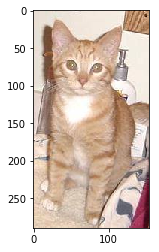

In [25]:
cat = cv2.imread(base_dir + '/train/cats/cat.154.jpg')
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)
plt.imshow(cat)

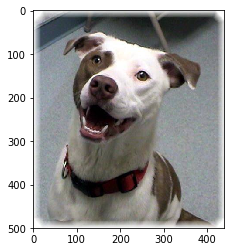

In [26]:
dog = cv2.imread(train_dogs_dir + '/dog.101.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

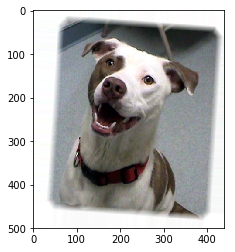

In [24]:
plt.imshow(image_gen.random_transform(dog))

In [27]:
image_gen.flow_from_directory(train_dir)

Found 2000 images belonging to 2 classes.


In [0]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [0]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [0]:
model.summary()

In [38]:
batch_size = 16
input_shape=(150,150,3)

train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


In [39]:
test_image_gen = image_gen.flow_from_directory(validation_dir,
                                               target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 1000 images belonging to 2 classes.


In [40]:
import warnings
warnings.filter('ignore')
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [42]:
result = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12)

Epoch 1/1
150/150 [==============================] - 119s 793ms/step - loss: 0.6988 - acc: 0.5242 - val_loss: 0.6934 - val_acc: 0.4635


In [45]:
result.history['acc']

[0.5241666666666667]

In [0]:
from keras.models import load_model

In [0]:
from google.colab import files

In [49]:
upload = files.upload()

Saving cat_dog_100epochs.h5 to cat_dog_100epochs.h5


In [0]:
new_model = load_model('cat_dog_100epochs.h5')

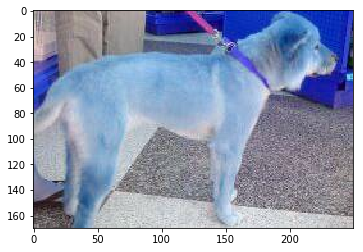

In [59]:
dog_file = validation_dogs_dir + '/dog.2090.jpg'
dog = cv2.imread(dog_file)

In [0]:
from keras.preprocessing import image

In [0]:
dog_img = image.load_img(dog_file, target_size=(150,150))

In [0]:
dog_img = image.img_to_array(dog_img)

In [65]:
import numpy as np
dog_img = np.expand_dims(dog_img,axis=0)
dog_img.shape

(1, 150, 150, 3)

In [0]:
dog_img = dog_img/255

In [70]:
model.predict(dog_img)

array([[0.49350873]], dtype=float32)